# LDA (LinearDiscriminantAnalysis)

In [1]:
import pandas as pd
file_path = "../../files/"

base = pd.read_csv(file_path + 'census.csv')

previsores = base.iloc[:, 0:14].values
classe = base.iloc[:, 14].values
                
from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size=0.15, random_state=0)

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
previsores_treinamento = lda.fit_transform(previsores_treinamento, classe_treinamento)
previsores_teste = lda.transform(previsores_teste)

/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [3]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)

## LDA - English ML-AZ

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(file_path + 'Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [7]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


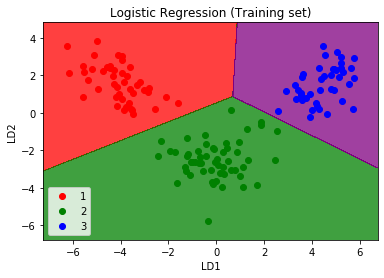

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


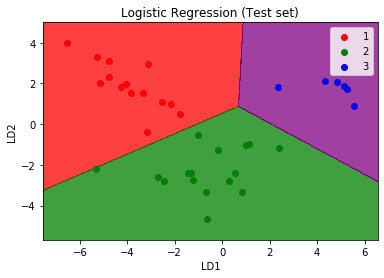

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Questions LDA - English ML-AZ

### LDA Intuition

+ Could you please explain in a more simpler way the difference between PCA and LDA?

A simple way of viewing the difference between PCA and LDA is that PCA treats the entire data set as a
whole while LDA attempts to model the differences between classes within the data. Also, PCA extracts
some components that explain the most the variance, while LDA extracts some components that maximize
class separability.

+ Feature Selection or Feature Extraction?

You would rather choose feature selection if you want to keep all the interpretation of your problem, your
dataset and your model results. But if you don’t care about the interpretation and only car about getting
accurate predictions, then you can try both, separately or together, and compare the performance results.
So yes feature selection and feature extraction can be applied simultaneously in a given problem.

+ Can we use LDA for Regression?

LDA is Linear Discriminant Analysis. It is a generalization of Fisher’s linear discriminant, a method used in
statistics, pattern recognition and machine learning to find a linear combination of features that characterizes
or separates two or more classes of objects or events. The resulting combination may be used as a linear
classifier, or, more commonly, for dimensionality reduction before later classification. However, for regression,
we have to use ANOVA, a variation of LDA. LDA is also closely related to principal component analysis
(PCA) and factor analysis in that they both look for linear combinations of variables which best explain the
data. LDA explicitly attempts to model the difference between the classes of data. PCA on the other hand
does not take into account any difference in class, and factor analysis builds the feature combinations based
on differences rather than similarities. Discriminant analysis is also different from factor analysis in that it is
not an interdependence technique: a distinction between independent variables and dependent variables (also
called criterion variables) must be made. LDA works when the measurements made on independent variables
for each observation are continuous quantities. When dealing with categorical independent variables, the
equivalent technique is discriminant correspondence analysis.

###  LDA in Python

+ Which independent variables are found after applying LDA?

The two independent variables that you see, indexed by 0 and 1, are new independent variables that are
not among your 12 original independent variables. These are totally new independent variables that were
extracted through LDA, and that’s why we call LDA Feature Extraction, as opposed to Feature Selection
where you keep some of your original independent variables.

+ How to decide the LDA n_component parameter in order to find the most accurate result?

You can run:
````
LDA(n\_components = None)
````
and it should give you automatically the ideal n_components.

+ How can I get the two Linear Discriminants LD1 and LD2 in Python?

You can get them by running the following line of code:

````
lda.scalings_
````